In [1]:
import numpy as np
import pandas as pd
from itertools import permutations
import csv
import numpy as np
 
start_value1= 1e-04
end_value1 = 8e-04
 
# Define the step size for the range
array = np.linspace(start_value1, end_value1, 30)  

csv_file = 'combinations.csv'
 
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['particle_diameter_1'])
    writer.writerows(zip(array))

print(array)

D_error = (end_value1-start_value1)/30
k_error = D_error**2/150*0.001/(1-0.1)**2
print(k_error)


[0.0001     0.00012414 0.00014828 0.00017241 0.00019655 0.00022069
 0.00024483 0.00026897 0.0002931  0.00031724 0.00034138 0.00036552
 0.00038966 0.00041379 0.00043793 0.00046207 0.00048621 0.00051034
 0.00053448 0.00055862 0.00058276 0.0006069  0.00063103 0.00065517
 0.00067931 0.00070345 0.00072759 0.00075172 0.00077586 0.0008    ]
4.481024234110654e-15


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

path = 'stochastic_tools_out.json'
data20 = pd.read_csv('CT1.csv')

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['particle_diameter_1']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']
df

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()

# # The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in, columns = t_header)
md_df = md_df.T
print('Modeling Results')
md_df *= 1e-6
md_df

Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.0,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339
0.1,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,...,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339,4.293339
0.2,4.293339,4.293339,4.293339,4.293338,4.293332,4.293309,4.293250,4.293133,4.292935,4.292633,...,4.280342,4.278489,4.276551,4.274536,4.272454,4.270316,4.268128,4.265899,4.263638,4.261350
0.3,4.293339,4.293339,4.293339,4.293330,4.293276,4.293106,4.292732,4.292062,4.291014,4.289530,...,4.244554,4.238641,4.232583,4.226412,4.220156,4.213842,4.207494,4.201134,4.194783,4.188456
0.4,4.293339,4.293339,4.293338,4.293286,4.293045,4.292406,4.291142,4.289061,4.286028,4.281974,...,4.184609,4.173196,4.161691,4.150150,4.138622,4.127149,4.115768,4.104513,4.093411,4.082484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49.6,2.583291,1.990486,1.507661,1.140218,0.872107,0.679952,0.542114,0.442004,0.367996,0.312255,...,0.120341,0.116391,0.113194,0.110620,0.108558,0.106917,0.105643,0.104699,0.103944,0.103346
49.7,2.580960,1.987979,1.505284,1.138146,0.870389,0.678558,0.540989,0.441090,0.367245,0.311632,...,0.120231,0.116298,0.113115,0.110554,0.108504,0.106872,0.105609,0.104671,0.103921,0.103327
49.8,2.578631,1.985478,1.502913,1.136079,0.868676,0.677170,0.539868,0.440179,0.366498,0.311012,...,0.120122,0.116205,0.113037,0.110489,0.108450,0.106827,0.105576,0.104644,0.103898,0.103308
49.9,2.576305,1.982980,1.500547,1.134019,0.866969,0.675786,0.538752,0.439272,0.365753,0.310395,...,0.120013,0.116113,0.112960,0.110424,0.108396,0.106783,0.105543,0.104616,0.103876,0.103290


(0.0, 50.0)

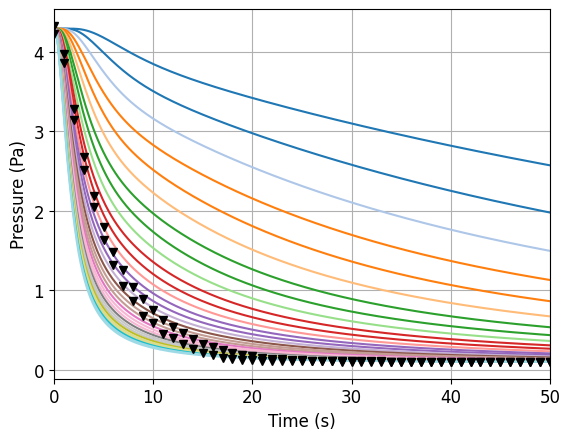

In [3]:
# Plot all pressure decays
ax = md_df.plot(colormap='tab20', legend=False)
plt.plot(data20['time'], data20['CT1_600_1']/1e6, color = 'k', marker = 'v', linestyle = '')
plt.plot(data20['time'], data20['CT1_600_2']/1e6, color = 'k', marker = 'v', linestyle = '')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (Pa)', fontsize = 12)
plt.grid()
plt.xlim(0,50)

minimum RMSE position:  15
minimum particle_diameter:  particle_diameter_1    0.000462
Name: 15, dtype: float64


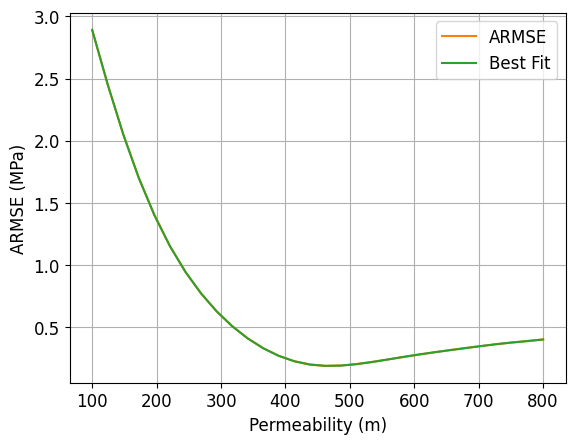

In [4]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_600_1']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 


index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)


parameters = pd.read_csv('combinations.csv')*1e6
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])

plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Permeability (m)', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

minimum RMSE position:  14
minimum particle_diameter:  particle_diameter_1    0.000438
Name: 14, dtype: float64


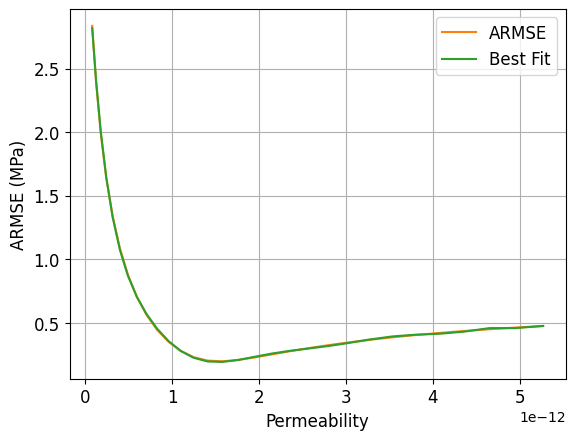

In [5]:

# Function to compute Absolute Root Mean Square Error (ARMSE) 
def compute_armse(y_values, experimental_y_values):
    absolute_error = np.abs(y_values - experimental_y_values)
    squared_error = absolute_error**2
    mean_squared_error = np.mean(squared_error)
    armse = np.sqrt(mean_squared_error)
    return armse

ARMSE = []

for i in range(md_df.shape[1]):
    pressure = md_df.iloc[:, i]  # Select column using numerical index
    y_values = pressure.values
    x_values = np.linspace(0, 50, 501)
    experimental_y_values = np.interp(x_values, data20['time'], data20['CT1_600_2']/1e6)
    range_of_observed_values = np.max(experimental_y_values) - np.min(experimental_y_values)
    armse = compute_armse(y_values, experimental_y_values)
    # narmse = compute_armse(y_values, experimental_y_values)/range_of_observed_values*100
    # Append the value to the NumPy array
    ARMSE = np.append(ARMSE, armse) 

index = np.argmin(ARMSE, axis = 0)
print(f"minimum RMSE position: ", index)
particle_diameter = pd.read_csv('combinations.csv')
min_particle_diameter = particle_diameter.iloc[index]
print(f"minimum particle_diameter: ", min_particle_diameter)

parameters = pd.read_csv('combinations.csv')**2/150*0.001/(1-0.1)**2
degree = 10 # Degree of the polynomial
coefficients = np.polyfit(parameters['particle_diameter_1'], ARMSE, degree)
poly_function = np.poly1d(coefficients)
y_fit = poly_function(parameters['particle_diameter_1'])

plt.plot(parameters['particle_diameter_1'], ARMSE, color='C1', label = 'ARMSE')
plt.plot(parameters['particle_diameter_1'], y_fit, color='C2', label = 'Best Fit')
plt.xlabel('Permeability', fontsize = 12)
plt.ylabel('ARMSE (MPa)', fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=12) 
plt.legend(fontsize = 12)
plt.grid()

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


TT1_1 = pd.read_csv('model_pellets_1.csv')
TT1_2 = pd.read_csv('model_pellets_2.csv')
plt.plot(TT1_1['time'], TT1_1['inlet-p'], label = 'CFD TT1')
plt.plot(TT1_2['time'], TT1_2['inlet-p'], label = 'CFD TT2')
plt.plot(data20['time'], data20['T1_600_1'], label = 'exp TT1')
plt.plot(data20['time'], data20['TT1_600_2'], label = 'exp TT2')
plt.grid()
plt.xlim(0, 50)
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'model_pellets_1.csv'